# Python Project - Life Expectancy

The dataset present within was sourced from Kaggle but comes from an aggregation from data provided by the W.H.O. It contains a list of 193 countries across multiple years with 20 predicting variables for each. It was aggregated in order to investigate if a link between immunization of diseases, human development and socio economic factors affected mortality rates and life expectancy.

Question: Does early life immunizations and health affect life expectancy?

Hypothesis: Yes, immunization and overall health in early development do have an effect on  mortality rate / life expectancy.

## Data Import

In [1]:
import pandas as pd #Block with all imported libraries
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from numpy import ones #used to add a constant in the linear regressions
from missingno import matrix #only need this single function from the Miissingno Library

dataset from: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv') #importing the dataset

## Data Ethics

This data was provided by the WHO and is taken from a national level so no medical data can be associated to any given individual.

# Initial EDA

A Glossary with a more detailed explanation of what each column represents can be found beneath the conclusion.

In [3]:
df.shape #shape is used to illustate the number of rows: 2938 and columns: 22

(2938, 22)

In [4]:
df.head(5) #checking data structure with head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.columns = ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling']
#Fix inconsistent Column Headers

In [33]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years',
       'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [6]:
#initial analysis to see basic statistics for the table, excluding 'Year'
df[['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling']].describe()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_Years,Thinness_5_to_9_Years,Income_Composition_of_Resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


The stats on life expectancy are of significant interest as they are the dependant variable in this data exploration.

In [7]:
# How many countries are developed and developing
Status_of_country = df.iloc[:,[0,2]]
Status_of_country_solo = Status_of_country.drop_duplicates()

In [8]:
str(len(Status_of_country_solo[Status_of_country_solo['Status'] == 'Developed'])) + ' Countries are developed' + ' and ' + str(len(Status_of_country_solo[Status_of_country_solo['Status'] == 'Developing'])) + ' Countries are developing'

'32 Countries are developed and 161 Countries are developing'

There are 32 countries classified as Developed and 161 countries classified as Developing.

Initially a pear plot was used to visualize some basic aggregations across all fields, but due to their vast number it was very difficult to garner any real insight and eas subsequently removed.

# Futher EDA to look into Null values

pd.isna is used to check if there are any missing values, which is then 
aggregated using the 'sum' method which agregates across all columns 
giving a clear representation of how much data is missing

In [9]:
pd.isna(df).sum() 

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_Five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
Thinness_1_to_19_Years              34
Thinness_5_to_9_Years               34
Income_Composition_of_Resources    167
Schooling                          163
dtype: int64

Its clear that there is significant Null values across the board but mostly 
concentrated in GDP, Hepetitis, and Population Data. Since this is a dataset
from the WHO, spanning countries across the globe, it makes sense that some 
developing countries won't have all figures readily available, but it does make 
working with the data more difficult.

<AxesSubplot:>

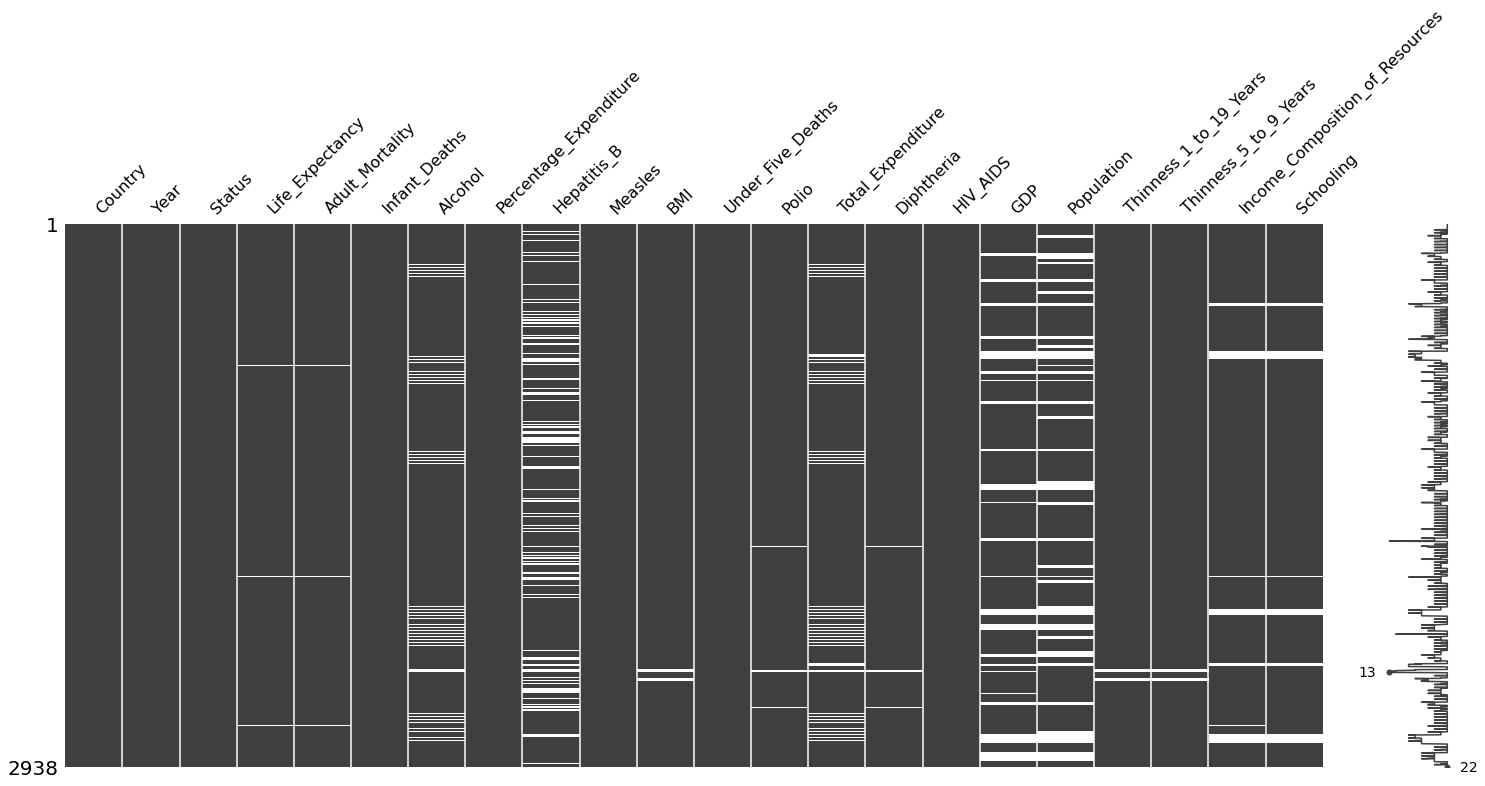

In [10]:
matrix(df) #imported from the missingno library to visualize the missing data

The following 3 blocks investigate the top 50 countries with missing values in: ['Population'], ['Hepatitis_B'] and ['GDP'] since they are the 3 sections with the most null values present.

In [11]:
Population_Null = pd.isna(df['Population']).groupby([df['Country']]).sum()
Population_Null.sort_values(ascending=False).head(50)

Country
Libya                                                   16
Saint Vincent and the Grenadines                        16
Cuba                                                    16
Czechia                                                 16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Somalia                                                 16
Egypt                                                   16
Singapore                                               16
Saudi Arabia                                            16
Gambia                                                  16
Grenada                                                 16
The former Yugoslav republic of Macedonia               16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                               

In [12]:
Hep_Null = pd.isna(df['Hepatitis_B']).groupby([df['Country']]).sum()
Hep_Null.sort_values(ascending=False).head(50)

Country
Denmark                                                 16
Norway                                                  16
Iceland                                                 16
Finland                                                 16
Hungary                                                 16
Switzerland                                             16
Japan                                                   16
United Kingdom of Great Britain and Northern Ireland    16
Slovenia                                                16
South Sudan                                             15
Equatorial Guinea                                       14
Somalia                                                 13
Haiti                                                   13
Sweden                                                  11
Netherlands                                             11
Ireland                                                 10
Namibia                                         

In [13]:
GDP_Null = pd.isna(df['GDP']).groupby([df['Country']]).sum()
GDP_Null.sort_values(ascending=False).head(50)

Country
Egypt                                                   16
Iran (Islamic Republic of)                              16
Czechia                                                 16
The former Yugoslav republic of Macedonia               16
Côte d'Ivoire                                           16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Slovakia                                                16
Bolivia (Plurinational State of)                        16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Gambia                                                  16
Republic of Korea                                       16
Republic of Moldova                                     16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
Bahamas                                         

Since there are 193 countries in this Dataset simply dropping 20-40 of them for ['Population'], ['Hepatitis_B'] and ['GDP'] respectively seems too drastic an approach especially since the majority of these countries are considered developing nations it would significantly skew our results. Sourcing the missing data would be the ideal scenario but seeing as this data was provided by the WHO, a politically very powerful organization, it is likely that many of the missing data points were simply not collected or withheld. In either case it is not a realistic solution to source this information given the scope of this project.

# Statistical Deep Dive with Plots

The following graphs were made with the intention to investigate the relationship between different fields present in the dataset.

Text(0.5, 0.98, 'Life Expectancy')

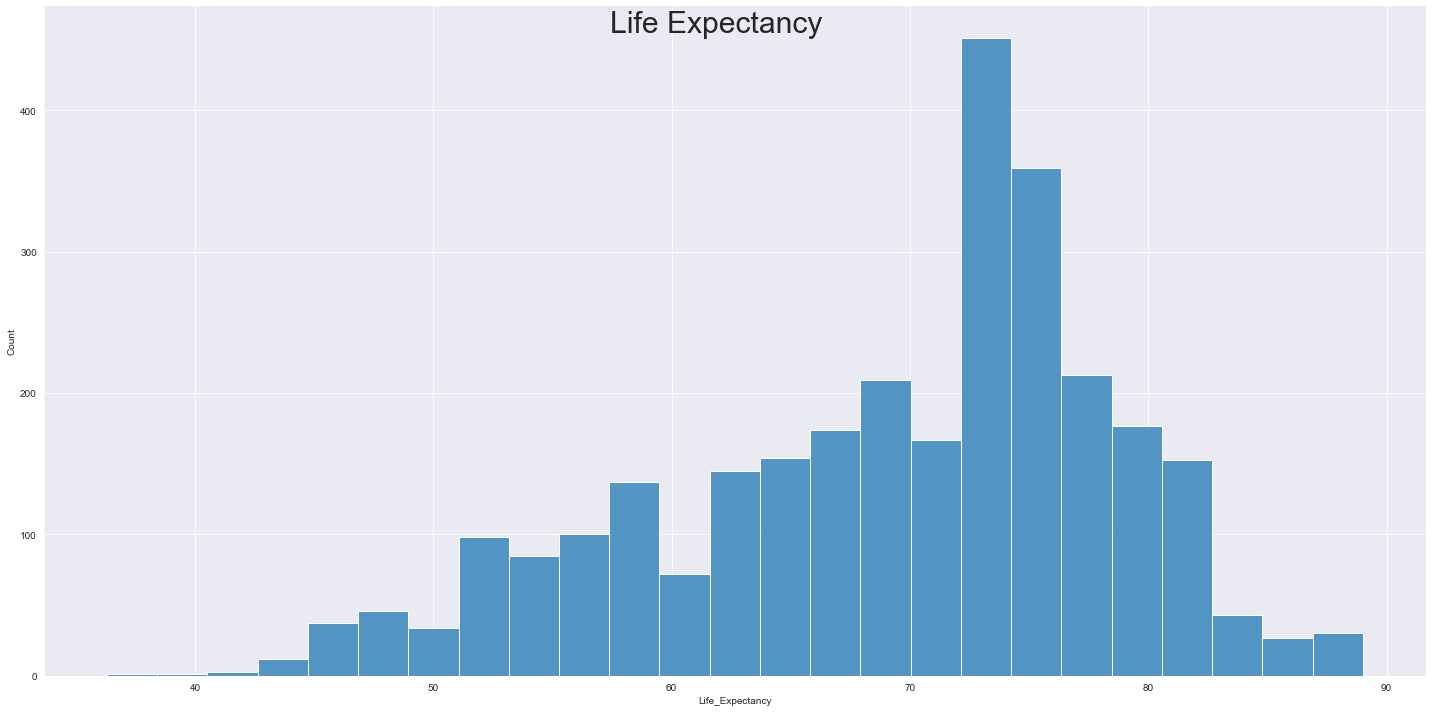

In [14]:
sns.set_style('darkgrid') #Set style to dark grid for readability
Life_Expectancy_Plot = sns.displot(df, x='Life_Expectancy', bins=25, height=10, aspect=2) #used to check how life expectancy is distributed across entire dataset
Life_Expectancy_Plot.fig.suptitle('Life Expectancy', fontsize=30) #used to add a title to the visual output

Life expectancy is normally distributed with a skew towards a higher life expectancy

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Measles'>

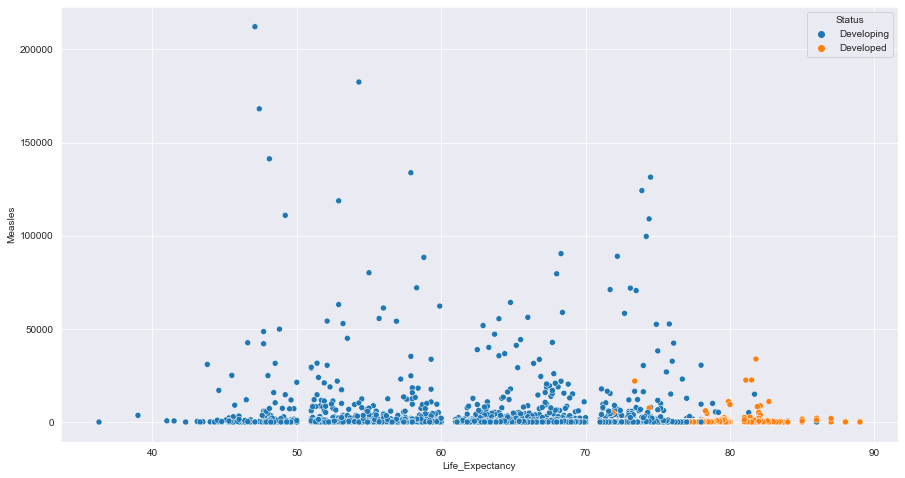

In [15]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='Measles', hue='Status')

The above visual compares life expectancy to the number of measles cases, split up by developing (blue) and developed countries(orange). Since 193 countries are present in this dataset the status of a country is used as a bucket to add another level of detail to the plot, it also makes clear that more developed countries where vaccination is more widely available see far fewer cases of measles. However most countries do not have a significant problem with measles ---------

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Hepatitis_B'>

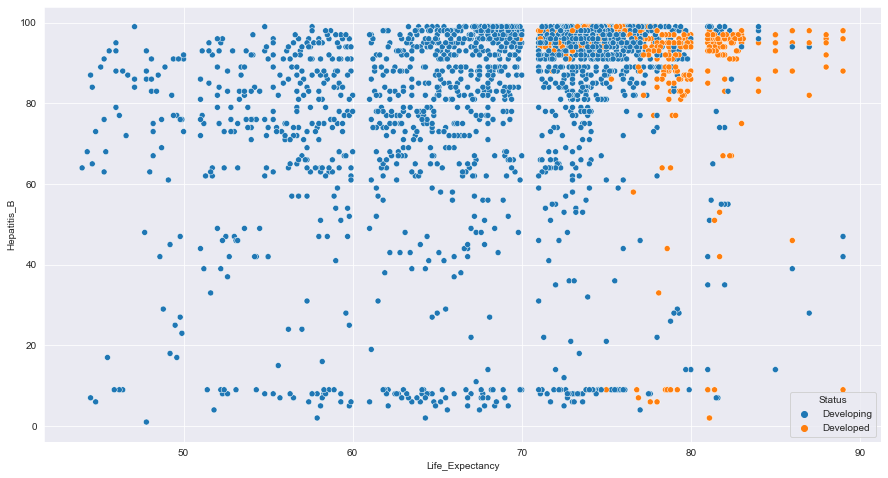

In [16]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='Hepatitis_B', hue='Status')

This scatter plot shows life expectancy vs the immunization coverage in percentage among 1 year olds. Even though there is fairly significant loss of data for the Hepatitis variable the scatter plot still serves a purpose in highlighting the data. 

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Polio'>

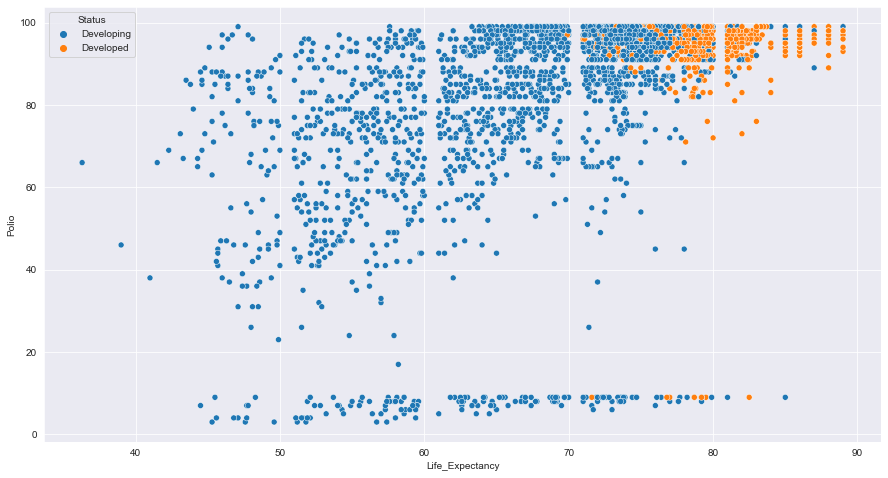

In [17]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='Polio', hue='Status')

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Diphtheria'>

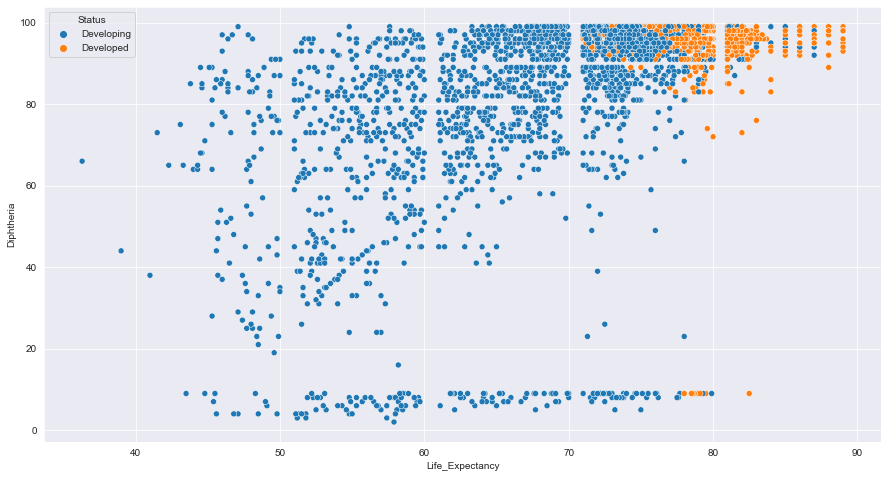

In [18]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='Diphtheria', hue='Status')

Both the Polio and Diphtheria plots relate immunization coverage among 1-year-olds (%) to life expectancy. Including the Hepatitis plot all 3 visuals are quite similar with clusters and trends occurring in roughly the same places.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Thinness_5_to_9_Years'>

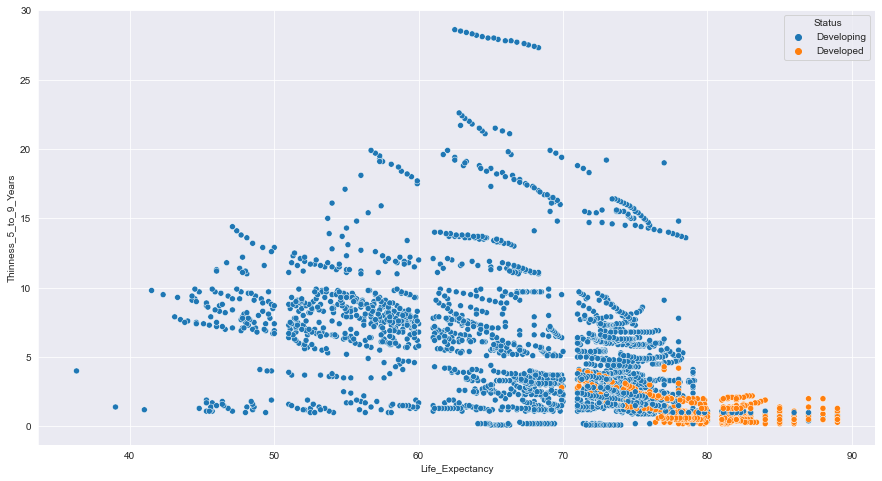

In [19]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='Thinness_5_to_9_Years', hue='Status')

Above the prevalence of thinness among children for Age 5 to 9(%) is measured against life expectancy, again a trend seems to emerge where more developed countries and countries with lower rates of thinness have longer lives.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='HIV_AIDS'>

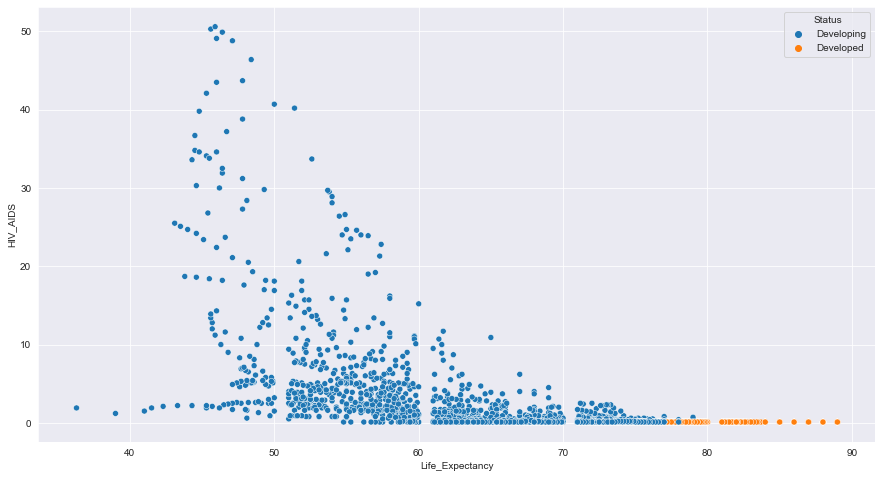

In [20]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='HIV_AIDS', hue='Status')

This graph illustrates the relationship between life expectancy and the number of deaths caused by HIV/AIDS (between the ages of 0-4) per 1000 live births. As the number of cases comes down there seems to be a trend towards a longer life, and again the more developed countries see hardly any cases when compared to many developing nations.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Total_Expenditure'>

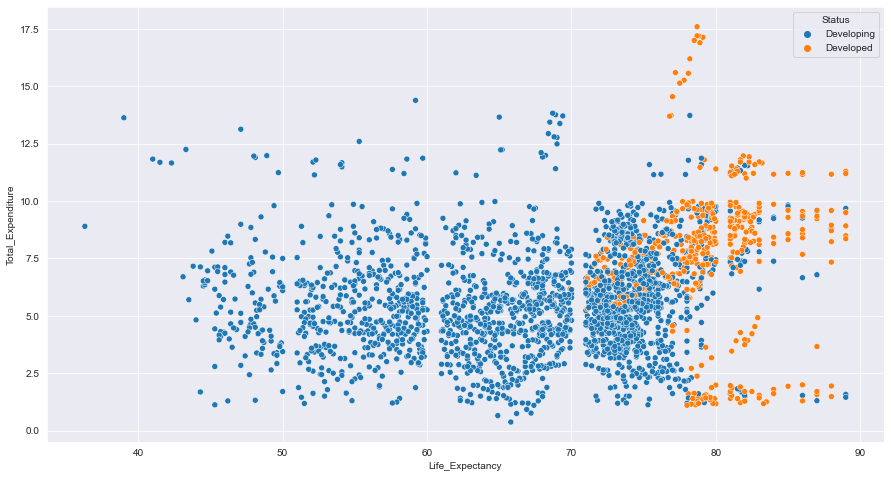

In [21]:
plt.figure(figsize=(15,8)) #used to increase the size of the visual
sns.scatterplot(data=df, x='Life_Expectancy', y='Total_Expenditure', hue='Status')

Finally a governments total expenditure as a % of total expenditure on health care versus life expectancy was plotted.

# Regression Moldels

In [22]:
#In order to prep the data for regression modelling the Status column will be split into
#two seperate columns which check the status as either 'Developped' or 'Developping'. 
Status_Check = pd.get_dummies(df['Status'])
df = pd.concat([df, Status_Check], axis=1)

## Three Separate Regression models will be made: All Fields, Medical Fields and Socio Economic Fields vs Life Expectancy

After each linear regression is initially setup the independent variables will be curated down, removing variables with high P values to try and get a better fitting model. Although dropping null values will create a bias in the linear regressions it is a mandatory for them to take place.

### Life Expectancy vs All Fields

In [23]:
regression_data = df[['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing']]
regression_data[['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing']].corr()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,...,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_Years,Thinness_5_to_9_Years,Income_Composition_of_Resources,Schooling,Developed,Developing
Life_Expectancy,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,...,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975,0.482136,-0.482136
Adult_Mortality,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,...,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612,-0.315284,0.315284
Infant_Deaths,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,...,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720,-0.112252,0.112252
Alcohol,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,...,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378,0.596660,-0.596660
Percentage_Expenditure,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,...,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687,0.454261,-0.454261
Hepatitis_B,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,...,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117,0.115317,-0.115317
Measles,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,...,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225,-0.076955,0.076955
BMI,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,...,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961,0.311257,-0.311257
Under_Five_Deaths,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,...,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373,-0.115195,0.115195
Polio,0.465556,-0.274823,-0.170689,0.221734,0.147259,0.486171,-0.136166,0.284569,-0.188720,1.000000,...,0.673553,-0.159560,0.211976,-0.038540,-0.221823,-0.222592,0.381078,0.417866,0.220250,-0.220250


In [24]:
#dropping null values
regression_data = regression_data.dropna(subset=['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing'])

In [25]:
dependent_vars = regression_data['Life_Expectancy']
independent_vars = regression_data[['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing']]
independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later


In [26]:
#ensure all data is numeric
dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)

In [27]:
#proceed with the linear regression
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     435.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:14:36   Log-Likelihood:                -4436.5
No. Observations:                1649   AIC:                             8913.
Df Residuals:                    1629   BIC:                             9021.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult_Mort

In [28]:
#Reiterating the Regression model by curating which variables are used
dependent_vars = regression_data['Life_Expectancy']
independent_vars = regression_data[['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Under_Five_Deaths', 'Diphtheria', 'HIV_AIDS', 'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing']]
independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later

dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)

lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     688.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:14:37   Log-Likelihood:                -4440.5
No. Observations:                1649   AIC:                             8907.
Df Residuals:                    1636   BIC:                             8977.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult_Mort

<ipython-input-28-f47248e66c89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later


After removing the 'Hepatitis_B', 'Measles', 'Polio' 'Total_Expenditure', 'GDP', 'Population', and 'Thinness_1_to_19_Years' variables the above linear regression table was formed. It is important to note that many variables relating to early immunization and health were removed, but the R-squared value did not change, which suggests these variables have little effect on the above model.

###  Life Expectancy vs Medical Fields

In [29]:
dependent_vars = regression_data['Life_Expectancy']
independent_vars = regression_data[['Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'HIV_AIDS', 'Thinness_1_to_19_Years', 'Thinness_5_to_9_Years']]
independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later

dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)
#proceed with the linear regression
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     315.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:14:37   Log-Likelihood:                -5156.4
No. Observations:                1649   AIC:                         1.033e+04
Df Residuals:                    1640   BIC:                         1.038e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Hepatitis_B               -0

<ipython-input-29-a08264972884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later


In [30]:
#curating the above model for efficiency
dependent_vars = regression_data['Life_Expectancy']
independent_vars = regression_data[['Hepatitis_B', 'BMI', 'Polio', 'Diphtheria', 'HIV_AIDS', 'Thinness_1_to_19_Years']]
independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later

dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)
#proceed with the linear regression
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     420.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:14:37   Log-Likelihood:                -5157.2
No. Observations:                1649   AIC:                         1.033e+04
Df Residuals:                    1642   BIC:                         1.037e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Hepatitis_B               -0

<ipython-input-30-5e0e84262328>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later


'Thinness 5 to 9 Years' and 'Measles' were removed, again the adjusted R-squared value did not change.

### Life Expectancy vs Socio Economic Fields

In [31]:
dependent_vars = regression_data['Life_Expectancy']
independent_vars = regression_data[['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Under_Five_Deaths', 'Total_Expenditure', 'GDP', 'Population', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing']]
independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later

dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)
#proceed with the linear regression
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     486.0
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:14:37   Log-Likelihood:                -4728.9
No. Observations:                1649   AIC:                             9482.
Df Residuals:                    1637   BIC:                             9547.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult_Mort

<ipython-input-31-0501d60414d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later


In [32]:
#curating the above model for efficiency
dependent_vars = regression_data['Life_Expectancy']
independent_vars = regression_data[['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Under_Five_Deaths', 'Income_Composition_of_Resources', 'Schooling', 'Developed', 'Developing']]
independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later

dependent_vars = dependent_vars.apply(float)
independent_vars = independent_vars.applymap(float)
#proceed with the linear regression
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     669.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:14:37   Log-Likelihood:                -4729.0
No. Observations:                1649   AIC:                             9476.
Df Residuals:                    1640   BIC:                             9525.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult_Mort

<ipython-input-32-45716b882af3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_vars['constant'] = ones((independent_vars.shape[0],)) #add a constant column for the regression, more on this later


'Population', 'GDP' and 'Total Expenditure' were taken out to arrive at the above linear regression, with r-squared remaining the same. 

In every case bar the medical regression 'Hepatitis','GDP' and 'Population' were eventually removed from the regressions, which removed a level of bias due to their very high null value count.

# Conclusion

The weakest model, 'medical fields' vs life expectancy had an adjusted R-squared value of 0.604  with 'all fields' and 'socio economic' having R-squared value of 0.834 and 0.766 respectively. Even the lowest value of 0.604 is still a very strong relationship, so rejecting the null hypothesis is the best plan of action. 

# Glossary

Country

Year

Status: Developed or Developing status

Life Expectancy: Life Expectancy in age

Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) 

Infant Deaths: Number of Infant Deaths in 1000s


Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 

Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%) 

Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles: Number of reported cases

BMI: Average Body Mass Index of entire population 

Under Five Deaths: Number of under-five deaths 

Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)

Total Expenditure: General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) 

HIV / AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years) 

GDP: Gross Domestic Product per capita (in USD)

Population

Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% ) 

Thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%) 

Income composition of Resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling: Number of years of Schooling(years)